# ReLU网络模拟任何函数
下面使用两层的ReLU网络来模拟函数$f(x) = ln(1+e^x)$。


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as DataLoader


import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


c:\Users\dhtfj\anaconda3\envs\AI_Detection\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Tagret function: $f(x) = ln(1+e^x)$

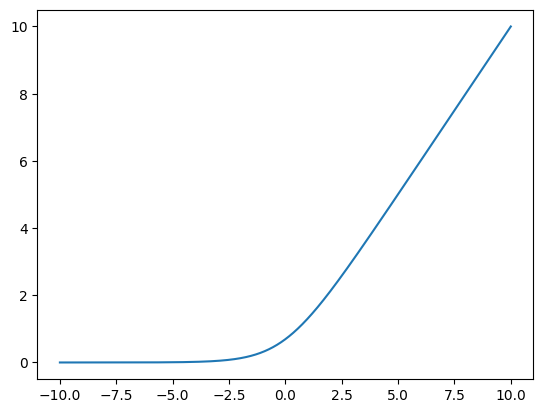

In [2]:
def target_function(x):
    return torch.log(1 + torch.exp(x))

x = torch.linspace(-10, 10, 1000)
y = target_function(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## Dataset

In [3]:
# Create train, val and test dataset
X = torch.linspace(-10, 10, 1000).reshape(-1, 1)
y = target_function(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.2)

# Create dataloaders
train_dataset = DataLoader.TensorDataset(X_train, y_train)
val_dataset = DataLoader.TensorDataset(X_val, y_val)
test_dataset = DataLoader.TensorDataset(X_test, y_test)

## Model

In [9]:
# Create Model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## Loss function

In [10]:
# Create loss
criterion = nn.MSELoss()

def validate(model, val_loader):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            y_pred = model(X_val)
            loss = criterion(y_pred, y_val)
            val_loss += loss.item()
    return val_loss / len(val_loader)

## Training Method

In [11]:
def train_one_epoch(model, train_loader, optimizer):
    model.train()
    train_loss = 0
    for X_train, y_train in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    return train_loss / len(train_loader)

def train(model, train_loader, val_loader, optimizer, epochs):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, optimizer)
        val_loss = validate(model, val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss}, Val Loss: {val_loss}")
    return train_losses, val_losses

## Model Training

Epoch 1/100, Train Loss: 14.707428073883056, Val Loss: 8.19561071395874
Epoch 2/100, Train Loss: 5.471445572376251, Val Loss: 1.7717478036880494
Epoch 3/100, Train Loss: 0.7493944764137268, Val Loss: 0.27080904841423037
Epoch 4/100, Train Loss: 0.2527051892131567, Val Loss: 0.19971970617771148
Epoch 5/100, Train Loss: 0.15154133141040801, Val Loss: 0.13457009047269822
Epoch 6/100, Train Loss: 0.12289286404848099, Val Loss: 0.11145746260881424
Epoch 7/100, Train Loss: 0.09809660129249095, Val Loss: 0.09416806697845459
Epoch 8/100, Train Loss: 0.07928965520113707, Val Loss: 0.0740020215511322
Epoch 9/100, Train Loss: 0.06433933321386576, Val Loss: 0.06099146381020546
Epoch 10/100, Train Loss: 0.052429931424558165, Val Loss: 0.05060333833098411
Epoch 11/100, Train Loss: 0.04364000363275409, Val Loss: 0.042376459389925
Epoch 12/100, Train Loss: 0.03714922610670328, Val Loss: 0.03596813566982746
Epoch 13/100, Train Loss: 0.031908430717885496, Val Loss: 0.03177859000861645
Epoch 14/100, Trai

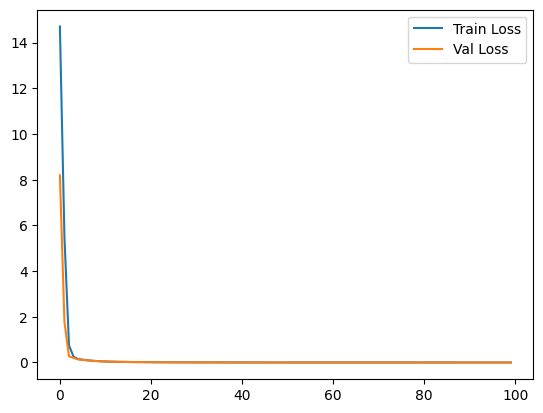

In [12]:
model = MyModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_loader = DataLoader.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader.DataLoader(val_dataset, batch_size=32, shuffle=False)

train_losses, val_losses = train(model, train_loader, val_loader, optimizer, epochs=100)

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.show()

## Model Evaluation

MSE: 0.00013982794189359993, MAE: 0.009434167295694351, R2: 0.9999862313270569, RMSE: 0.011824886314570904


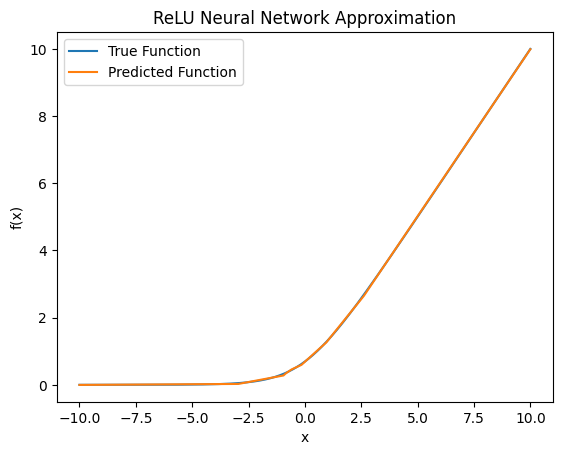

In [15]:
# Test the model
test_loader = DataLoader.DataLoader(test_dataset, batch_size=32, shuffle=False)
model.eval()
with torch.no_grad():
    y_pred = model(X)
    #多种评价指标拟合效果，包括MSE, MAE, R2, RMSE
    mse = criterion(y_pred, y)
    mae = F.l1_loss(y_pred, y)
    r2 = 1 - mse / torch.var(y)
    rmse = torch.sqrt(mse)
    print(f"MSE: {mse}, MAE: {mae}, R2: {r2}, RMSE: {rmse}")

plt.plot(X.numpy(), y.numpy(), label='True Function')
plt.plot(X.numpy(), y_pred.numpy(), label='Predicted Function')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("ReLU Neural Network Approximation")
plt.show()